**AIVLE School 미니프로젝트**
### **통신 서비스 이용 고객의 <span style="color:darkgreen">이탈 여부</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 고객 관련 데이터를 분석한 후 고객의 서비스 중단 또는 경쟁업체로의 이탈 여부를 예측하는 머신러닝, 딥러닝 모델을 만들고 결과를 예측하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

<br>

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [48]:
# 여기에 답안코드를 작성하세요.
import sklearn as sk

<br>

### 2. Pandas를 사용할 수 있도록 별칭(alias)을 pd로 해서 불러오세요.

In [49]:
# 여기에 답안코드를 작성하세요.
import pandas as pd

<br>

### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* churn_data.csv 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.

In [50]:
# 여기에 답안코드를 작성하세요.
df = pd.read_csv('/churn_data.csv')

<br>

### 4. df에서 불필요한 customerID 컬럼을 삭제하고 df1에 저장하세요.

In [51]:
# 여기에 답안코드를 작성하세요.
df1 = df.drop('customerID', axis=1)

<br>

### 5. df1의 TotalCharges 컬럼의 타입을 float로 변경하세요.
* TotalCharge의 컬럼 타입을 확인하는 코드를 작성하세요.
* ' ' 값을 0으로 변환하고 컬럼 타입을 float로 변경하세요.
* 전처리 후 데이터를 df2에 저장하세요.

In [52]:
# 여기에 답안코드를 작성하세요.
print(df1['TotalCharges'].dtype)
df1['TotalCharges'] = df1['TotalCharges'].replace(' ',0).astype(float)
print(df1['TotalCharges'].dtype)
df2 = df1

object
float64


<br>



```
# 코드로 형식 지정됨
```

### 6. df2에서 Churn 컬럼의 데이터별 개수를 확인하는 코드를 작성하고 df2를 df3에 저장하세요.
### df2의 churn 컬럼의 Yes, No를 각각 1, 0으로 변환한 후 df의 churn 컬럼에 저장하세요.

In [53]:
# 여기에 답안코드를 작성하세요.
print(df2['Churn'].value_counts())
df2['Churn'] = df2['Churn'].replace({'Yes':1, 'No':0})
print(df2['Churn'].value_counts())
df3 = df2

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
0    5174
1    1869
Name: count, dtype: int64


<ipython-input-53-79437670f7ea>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Churn'] = df2['Churn'].replace({'Yes':1, 'No':0})


<br>

### 7. df3의 모든 컬럼에 대해 결측치를 확인하는 코드를 작성하고 결측치를 처리하세요.
* df3을 df4에 저장하세요.
* df4의 결측치가 40% 이상인 컬럼은 컬럼을 삭제하세요.
* df4의 결측치가 40% 미만인 컬럼은 결측치가 있는 row를 삭제하세요.

<br>

In [54]:
# 여기에 답안코드를 작성하세요.
missing_ratio = df4.isnull().mean()
# 결측치 비율이 40% 이상인 컬럼을 삭제
df4 = df4.loc[:, missing_ratio < 0.4]
# 결측치 비율이 40% 미만인 컬럼에서 결측치가 포함된 행을 삭제
df4 = df4.dropna()

df4.isnull().sum()

,0
gender,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
TechSupport,0


### 8. df4에서 SeniorCitizen 컬럼을 bar 차트로 확인해보고 불균형을 확인해보세요.
### SeniorCitizen 컬럼은 불균형이 심하므로 삭제하세요.

In [55]:
# 여기에 답안코드를 작성하세요.
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df4, x='SeniorCitizen', palette='pastel')
plt.show()
df4 = df4.drop('SeniorCitizen', axis=1)


ValueError: Could not interpret value `SeniorCitizen` for `x`. An entry with this name does not appear in `data`.

<br>

### 9. df4에서 다음의 가이드에 따라 데이터를 시각화 해보세요.
* tenure (서비스 사용기간)에 대해 히스토그램으로 시각화 하세요.
* tenure를 x 값으로 churn을 hue 값으로 사용하여 kdeplot으로 시각화 하고 '서비스 사용기간이 길어질 수록 이탈이 적다'에 대해 'O'인지 'X'인지 출력하세요.
* 'tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 확인하여 heatmap으로 시각화하고 가장 높은 상관계수 값을 출력하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df4['tenure'], bins=30,color='skyblue')
plt.subplot(1, 2, 2)
sns.kdeplot(data=df4, x='tenure', hue='Churn', fill=True, common_norm=False, palette='muted')
plt.show()

cm = df4[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

hc = cm.unstack().sort_values(ascending=False) # unstack()을 사용하면 이 2차원 행렬을 1차원 시리즈로 변환할 수 있음
hc = hc[hc < 1.0]
print(f"가장 높은 상관계수 값: {hc.iloc[0]}")

<br>

### 10. df4에서 컬럼의 데이터 타입이 object인 컬럼들을 원-핫 인코딩하세요.
* 컬럼의 데이터 타입이 object인 컬럼들을 object_cols 변수에 저장하세요.
* object_cols 변수의 컬럼들을 원-핫 인코딩하세요.
* 전처리된 데이터를 df5에 저장하세요.

In [56]:
# 여기에 답안코드를 작성하세요.
object_cols = df4.select_dtypes(include=['object']).columns
df5 = pd.get_dummies(df4, columns=object_cols)

<br>

### 11. df5에 대해 Scikit-learn의 train_test_split 함수로 훈련, 검증 데이터를 분리하세요.
* 입력 : X, y (y에는 churn을 저장하고 X에는 churn을 제외한 나머지를 저장하세요)
* Train : Test 비율 = 8:2
* y Class 비율에 맞게 나누는 옵션을 추가하세요.
* random_state=42 로 설정하세요.
* 결과 : X_train, X_valid, y_train, y_valid에 저장하세요.

In [57]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import train_test_split
X = df5.drop('Churn', axis=1)
y = df5['Churn']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<br>

### 12. MinMaxScaler 함수를 'scaler'로 정의하고 데이터를 정규화하세요.

In [58]:
# 여기에 답안코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

<br>

### 13. 고객 이탈 여부를 예측하는 머신러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* LogisticRegression 모델 정의하고 학습시키세요.
* KNN으로 모델을 정의하고 학습시키세요. (n_neighbors=5)
* Decision Tree로 모델을 정의하고 학습시키세요. (max_depth=10, random_state=42)
* RandomForest로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)
* XGBoost로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* Light GBM으로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* 각각 다른 셀에 답안코드를 작성하세요.

In [59]:
# 여기에 답안코드를 작성하세요.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [60]:
# 여기에 답안코드를 작성하세요
from sklearn.neighbors import KNeighborsClassifier
model1= KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
# 여기에 답안코드를 작성하세요.
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=10, random_state=42)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [62]:
# 여기에 답안코드를 작성하세요.
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=3, random_state=42)
model3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [63]:
# 여기에 답안코드를 작성하세요.
from xgboost import XGBClassifier
model4 = XGBClassifier(n_estimators=3, random_state=42)
model4.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [64]:
# 여기에 답안코드를 작성하세요.
from lightgbm import LGBMClassifier
model5 = LGBMClassifier(n_estimators=3, random_state=42)
model5.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1493, number of negative: 4128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 5621, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265611 -> initscore=-1.017006
[LightGBM] [Info] Start training from score -1.017006


LGBMClassifier(n_estimators=3, random_state=42)

### 14. 바로 위 Light GBM 모델의 성능을 평가하려고 합니다.
### y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화하세요.
### 그리고 Scikit-learn의 classification_report를 활용하여 성능을 출력하세요.

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       373

    accuracy                           0.73      1406
   macro avg       0.37      0.50      0.42      1406
weighted avg       0.54      0.73      0.62      1406



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


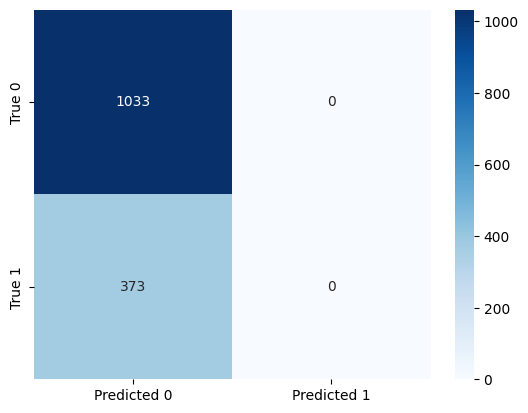

In [65]:
# 여기에 답안코드를 작성하세요.
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model5.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
print(classification_report(y_valid, y_pred))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.show()

##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

### 15. 고객 이탈여부를 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [67]:
# 여기에 답안코드를 작성하세요.
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7526 - loss: 0.5059 - val_accuracy: 0.7824 - val_loss: 0.4447
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7958 - loss: 0.4236 - val_accuracy: 0.7866 - val_loss: 0.4384
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8067 - loss: 0.4179 - val_accuracy: 0.7916 - val_loss: 0.4357
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8112 - loss: 0.4106 - val_accuracy: 0.7923 - val_loss: 0.4327
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8102 - loss: 0.4095 - val_accuracy: 0.7902 - val_loss: 0.4320
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8071 - loss: 0.4096 - val_accuracy: 0.7909 - val_loss: 0.4309
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8079 - loss: 0.4033 - val_accuracy: 0.7923 - val_loss: 0.4292
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8139 - loss: 0.4011 - val_accuracy: 0.7916 - val_

<br>

### 16. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 accuracy와 검증 accuracy를 그래프로 표시하세요.
* 1개의 그래프에 학습 accuracy와 검증 accuracy 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'acc', 'val_acc'로 표시하세요.
* 그래프의 타이틀은 'Accuracy'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'Acc'라고 표시하세요.

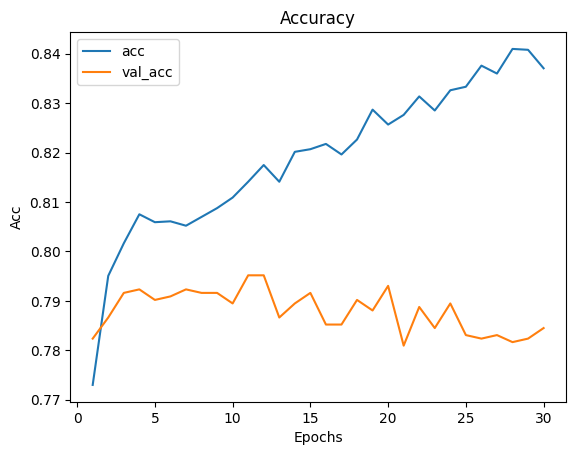

In [68]:
# 여기에 답안코드를 작성하세요.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,31)

plt.plot(epochs, acc, label='acc')
plt.plot(epochs, val_acc, label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

### [선택] 모든 과정을 수행한 후에는 머신러닝, 딥러닝 모델의 성능을 향상시켜보세요.